# Module Title:	 Data Visualization Techniques   
### Assessment Title: CA1_DVis_HDip_Lvl8  
### Lecturer Name:	 David McQuaid  
### Student Full Name & Student ID:	Natalia de Oliveira Rodrigues 2023112

Link to my GitHub Repository: https://github.com/norodrigues111/Data-Visualization-Techniques.git

**Scenario:**  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


**Requirements:** 
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  

Part 1: (Column Names are denoted by quotation marks)  (30 marks)
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)  
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?  


Part 2  (20 marks)
  
•	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.

Part3:  (50 marks)
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  



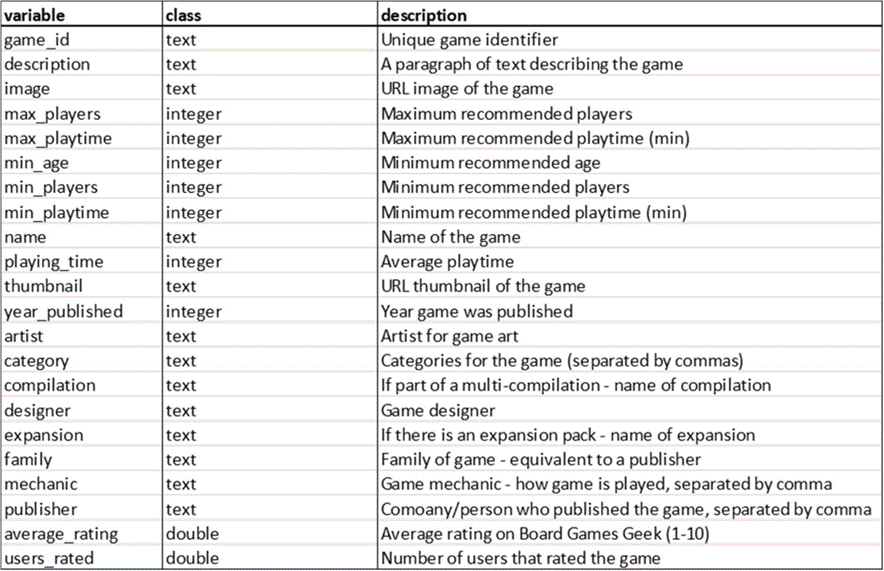

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 


# Exploration Data Analysis

In [2]:
df = pd.read_csv('../../data/board_games.csv')
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [4]:
df.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [5]:
df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

### PART 1:
    What are the top 5 “average rated” games? 
    Is there a correlation between the “users_rated” and the “max_playtime”? 
    What is the distribution of game categories? (You may not use a barchart)
    Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)? 
    What are the 5 most common “mechanics” in the dataset? 

# What are the top 5 “average rated” games? 


> In order to plot the top 5 average rated games, the dataset was sorted in decrescent order, the function **head()** was used to save in the new dataframe **top5_avg_rated_df** only the TOP 5 and the average rating results were rounded to **2 decimal places**, so the numbers displayed would be easier to read. 

In [6]:
top5_avg_rated_df = df.sort_values(by='average_rating', ascending=False).head()

In [7]:
top5_avg_rated_df['average_rating'] = top5_avg_rated_df['average_rating'].round(3)

In [8]:
top5_avg_rated_df = top5_avg_rated_df[['name','average_rating']]
top5_avg_rated_df

,name,average_rating
8348,Small World Designer Edition,9.004
6392,Kingdom Death: Monster,8.932
9964,Terra Mystica: Big Box,8.849
8526,Last Chance for Victory,8.846
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.831


> The check of the TOP 5 games names was performance. As they are long names, to improce the visualization, the reduction of the character on the names was necessary. To avoid displaying names that could cause duality, before reducing the games' names the others games' names where checked using the function ***str.startswith()**.

In [9]:
top5_avg_rated_df.name.unique()

array(['Small World Designer Edition', 'Kingdom Death: Monster',
       'Terra Mystica: Big Box', 'Last Chance for Victory',
       'The Greatest Day: Sword, Juno, and Gold Beaches'], dtype=object)

In [10]:
names_check = df[df['name'].str.startswith(('Small World Designer','Kingdom Death','Terra Mystica',
                                            'Last Chance','The Greatest Day'))]
names_check = names_check['name'].sort_values()
names_check

6392                             Kingdom Death: Monster
8526                            Last Chance for Victory
8348                       Small World Designer Edition
7727                                      Terra Mystica
9964                             Terra Mystica: Big Box
9675    The Greatest Day: Sword, Juno, and Gold Beaches
Name: name, dtype: object

In [11]:
games_names=['Small World Designer', 'Kingdom Death',
       'Terra Mystica: Big Box', 'Last Chance for Victory',
       'The Greatest Day']

# Visualization

> Figuresize was used to increase the size of the figure which helps giving more space because we have long labels.

> Set_style('whitegrid') makes the background lighter so the bar stand out.

> Palette 'Viridis'

> Set_xticklabels was used to use the shorter game names created below, and to rotate 90 degrees its position to make it legible.

> Function **bar.label()** used to add label on top of the bar for clarity.

> To improve clarity and understanding to the visualization, axis (x,y) labels and title were added. The title was made larger for enphasis. 



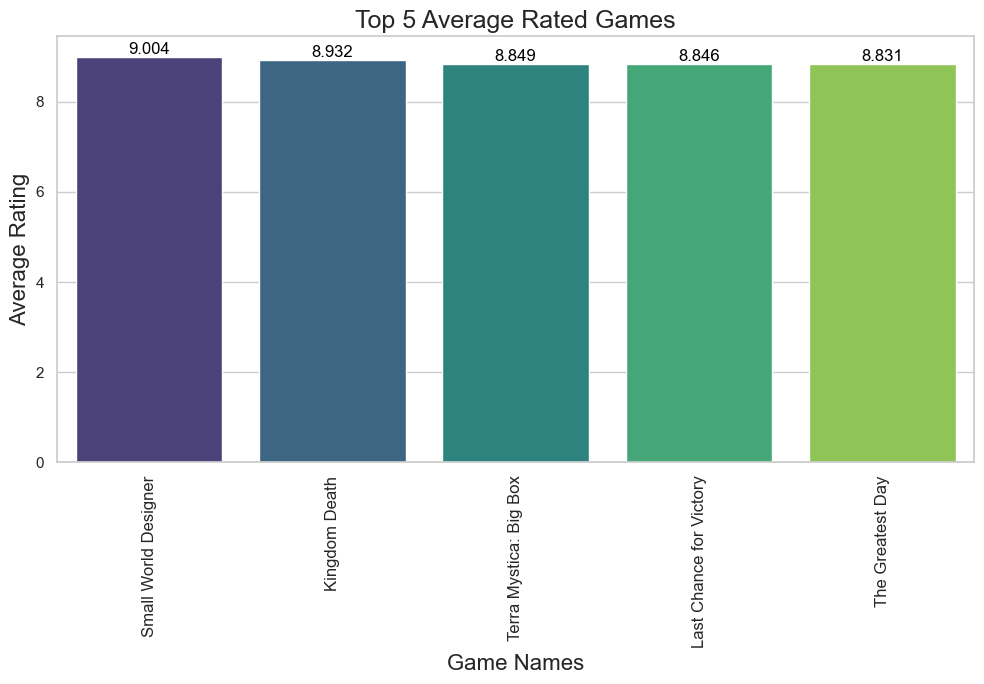

In [21]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')

ax = sns.barplot(data=top5_avg_rated_df, x='name',y='average_rating',palette='viridis')
ax.bar_label(ax.containers[0], fontsize=12,color='black')
ax.set_xticklabels(games_names, rotation=90,fontsize=12)
ax.set_xlabel('Game Names', fontsize=16)
ax.set_ylabel('Average Rating', fontsize=16)
ax.set_title('Top 5 Average Rated Games', fontsize=18)

plt.tight_layout()
plt.show();
